Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE"

Do not edit or insert code into the test cells as all you insert will be overwritten by the automated testing code.

---

**Question 5**: The Maxwell (or Maxwell-Boltzmann) distribution gives the distribution of speeds of molecules in thermal equilibrium as given by statistical mechanics. The distribution function is given as $$p(v)=\sqrt{\frac{2}{\pi}}\,\frac{v^{2}\,\exp\left(-\frac{v^{2}}{2\,a^{2}}\right)}{a^{3}}$$ with speed $v$ and $$a=\sqrt{\frac{k\,T}{m}}$$ and $k$ the Boltzmann constant, $T$ the temperature and $m$ the atomic mass of the molecules. 

Consider the SciPy function `scipy.stats.maxwell` which permits to draw random speed values from a Maxwell distribution. Given a value for the parameter $a$, the speed distribution can be used as `sample = maxwell.rvs(scale=a, size=1000)` to obtain a thousand random speeds from the Maxwell distribution with the correct temperature and molecule mass. Use the `scipy.constants` library to define the molecule mass in atomic mass units in kg and obtain the correct Boltzmann constant. Use SI units throughout.

**Task**: **(a)** Write a function `samples(T1, T2, mass)` which draws two samples of 1000 random speed values each from the Maxwell distribution with temperatures $T_{1}$ and $T_{2}$ and atomic mass in units of kg as input. 

The first sample should represent Helium gas atom speeds at room temperature ($T_{1}=290\,$K), the second cold Helium at $T_{2}=4.2\,$K. Use the `scipy.constants` library to define the Helium atom mass at 4 atomic mass units in kg.

**(b)** Write a function `doCollision(ncoll, sample1, sample2)` which takes the number of simulated collisions as input as well as the two prepared samples. For each collision simulation create a random pair from members of both samples and determine the absolute **energy** difference. Add half the energy difference to the slower molecule and subtract half the energy difference from the faster molecule so that in the end both have the same energy. Then obtain the speed of the individual molecules from their energy and change it in the speed sample array accordingly for both and collide the next pair. Merge the distributions into one and return the combined distribution.

Simulate $10^{4}$ collisions between the hot and cold Helium and print the final temperature value, calculated from the final mean value. The mean value of the Maxwell distribution in the notation from above is given as $$\mu=2\,a\,\sqrt{\frac{2}{\pi}}.$$ Plot the merged (concatenated) speed distribution histogram (20 bins are recommended) with appropriate axes labels and title.

Note that the energy redistribution mechanism as described in (b) is unrealistic but simple to code hence this is not a good physics model. Take it as an educational exercise rather than a serious model. The collision dynamics could easily be changed and made much more realistic.

Final temperature value: 176.35111907359996


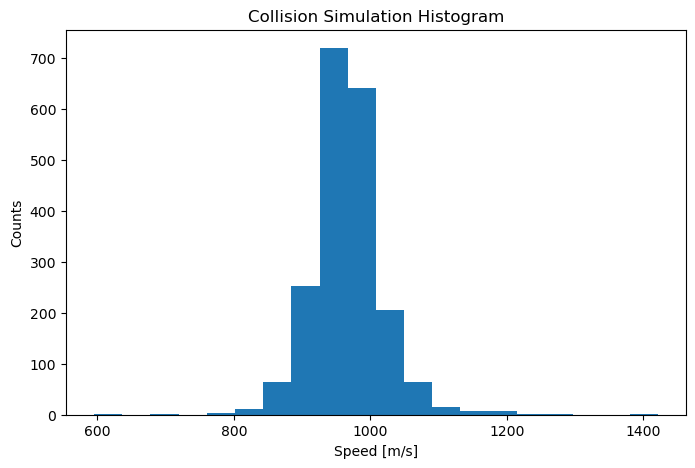

In [1]:
# YOUR CODE HERE
# YOUR CODE HERE
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as pc
from scipy.stats import maxwell

# Task (a) sample function
def samples(T1, T2, mass):
    '''
    Parameters
    ----------
    T1 : First temperature
    T2 : Second temperature
    mass : Mass of the particle

    Returns
    -------
    samp1 : 1000 element array based on T1
    samp2 : 1000 element array based on T2
    '''
    # creating two samples with the given parameters
    a1 = np.sqrt((pc.k * T1) / mass)
    a2 = np.sqrt((pc.k * T2) / mass)
    samp1 = maxwell.rvs(scale = a1, size = 1000)
    samp2 = maxwell.rvs(scale = a2, size = 1000)
    return samp1, samp2

# Task (b) doCollision
def doCollision(ncol, sample1, sample2):
    '''
    Parameters
    ----------
    ncol : Number of collisions
    sample1 : Array of speed for first sample
    sample2 : Array of speed for second sample

    Returns
    -------
    A concatenated array after simulation of collisions    
    '''
    # simulating the collisions ncol times and returning the finalised speed
    for _ in range(ncol):
        rand1 = np.random.randint(0,1000)
        rand2 = np.random.randint(0,1000)
        # calculate kinetic energy and simulating the changes
        ke1 = 0.5 * sample1[rand1] ** 2
        ke2 = 0.5 * sample2[rand2] ** 2
        diff = ke1 - ke2
        ke1 -= diff / 2
        ke2 += diff / 2
        sample1[rand1] = np.sqrt(2 * ke1)
        sample2[rand2] = np.sqrt(2 * ke2)
    return np.hstack((sample1, sample2))

# Generating plot values
m = 4.0*pc.u
wh, ch = samples(290, 4.2, m)
final = doCollision(10000, wh, ch)
T = (np.mean(final)/2.0*np.sqrt(np.pi/2))**2 * m / pc.k
print("Final temperature value:", T)

# Graph settings
plt.figure(figsize = (8, 5))
plt.title("Collision Simulation Histogram")
plt.hist(final, bins = 20)
plt.xlabel("Speed [m/s]")
plt.ylabel("Counts")
plt.show()


In [2]:
# Test cell
import scipy.constants as pc
m = 4.0*pc.u
wh, ch = samples(290, 4.2, m)
assert (len(wh)==1000), 'wrong sample size'

In [3]:
# Test cell
import numpy as np
assert (np.mean(wh)>1200.0 and np.mean(wh)<1300.0), 'wrong room temperature helium distribution'
assert (np.mean(ch)>130.0 and np.mean(ch)<155.0), 'wrong cold temperature helium distribution'

In [4]:
# Test cell
from math import sqrt, pi
final = doCollision(10000, wh, ch)
T = (np.mean(final)/2.0*sqrt(pi/2))**2 * m / pc.k
assert (T>165.0 and T<190.0), 'wrong final temperature'

### Tests 3 marks; Style 1 mark; Plot - 2 marks